In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

review_list = []
url = 'https://movie.daum.net/moviedb/grade?movieId=94484&type=netizen&page=()'   #https://movie.daum.net/moviedb/grade?movieId=94484&type=netizen&page=1

for n in range(1, 5):
    target = urlopen(url.format(n))
    soup = BeautifulSoup(target, 'html.parser')
    reviews = soup.select('p.desc_review')

    for review in reviews:
        str = review.get_text().strip()
        review_list.append(str)

file = open('data/output/아쿠아맨.txt', 'w')

for review in review_list:
    file.write(review + '\n')
    
file.close()

In [2]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806' #네이버 평점 사이트
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [3]:
import pandas as pd
# 영화 제목 갖고 오기
soup.find_all('div', 'tit5')[0].a.string

# 포인트 가져오기
soup.find_all('td', 'point')[0].string

movie_title = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 47)]
movie_title

movie_rating = [soup.find_all('td', 'point')[n].string for n in range(0, 47)]

date = pd.date_range('2017-5-1', periods = 100, freq = 'D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [4]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_title = []
movie_rating = []

for today in tqdm_notebook(date):
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    page = urlopen(url.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(page, 'html.parser')
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_title.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_rating.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [5]:
movie = pd.DataFrame({'date': movie_date, 'title': movie_title, 'rating': movie_rating})
movie.head()

movie['rating'] = movie['rating'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date      4723 non-null datetime64[ns]
title     4723 non-null object
rating    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [6]:
import numpy as np

# 영화별 평점의 합계를 
movieGroup = pd.pivot_table(movie, index = ['title'], aggfunc = np.sum)
movie_best = movieGroup.sort_values(by = 'rating', ascending = False)
movie_best.head()

,rating
title,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [11]:
# 특정 영화의 정보 확인
tmp = movie.query("title == ['서서평, 천천히 평온하게']")

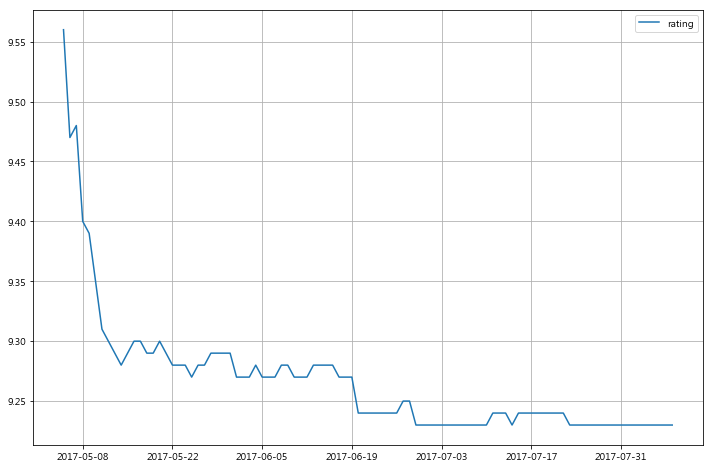

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize = (12, 8))
plt.plot(tmp['date'], tmp['rating'])
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [13]:
movie_pivot = pd.pivot_table(movie, index = ['date'], columns= ['title'], values = ['rating'])
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

title,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


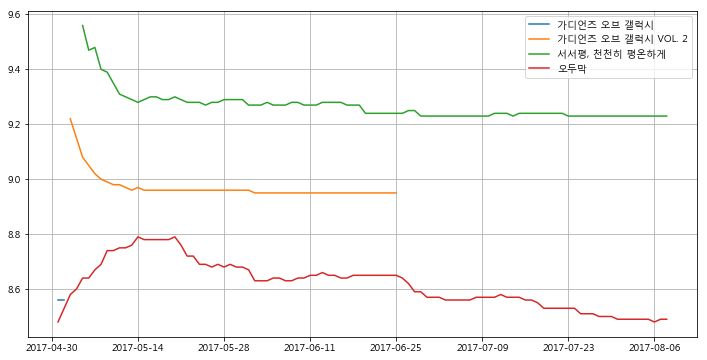

In [15]:
import platform
from matplotlib import font_manager, rc

path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

target_col = ['가디언즈 오브 갤럭시', '가디언즈 오브 갤럭시 VOL. 2', '서서평, 천천히 평온하게', '오두막']
plt.figure(figsize = (12, 6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc = 'best')
plt.grid()

### 로그인을 해야하는 상황
    - http
    - https

In [21]:
import requests

url = 'http://www.hanbit.co.kr/member/login_proc.php'
loginInfo = {
    'return_url': 'http://hanbit.co.kr/index.html',
    'm_id': 'netsong7',
    'm_passwd': ''
}

session = requests.session()
response = session.post(url, loginInfo)
response.raise_for_status()
print(response.text)

<meta http-equiv="Content-Type" content="text/html; charset=utf-8"><script>alert('해당 회원의 정보가 없습니다.\n아이디/패스워드를 확인해주세요.')</script><script>history.go(-1)</script>


### Selenium Framwork
    - PhantonJS 또는 Chrome Driver
    - pip install selenium

In [24]:
!pip install selenium

In [45]:
from selenium import webdriver

# Chrome의 경우 | 아까 받은 chromedriver의 위치를 지정해준다.
driver = webdriver.Chrome('C:/MLPlay/pythonWork/chromedriver_win32/chromedriver')
driver.get('http://naver.com')

In [31]:
driver.save_screenshot('data/images/navermainPage.png')

True

In [68]:
driver = webdriver.Chrome('C:/MLPlay/pythonWork/chromedriver_win32/chromedriver')
driver.get('https://nid.naver.com/nidlogin.login')

elem_login = driver.find_element_by_name('id')
elem_login.clear()
elem_login.send_keys('chyoung513')

elem_login = driver.find_element_by_name('pw')
elem_login.clear()
elem_login.send_keys('zhanying520!')

xpath = '''//*[@id="frmNIDLogin"]/fieldset/input'''
driver.find_element_by_xpath(xpath).click()

In [46]:
driver.get('http://mail.naver.com')

In [48]:
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')

raw_list = soup.find_all('div', 'name_ccr(lst.from)')

driver.close()

### 셀프 주유소는 정말 저렴한가?
    http://www.opinet.co.kr

In [71]:
driver = webdriver.Chrome('C:/MLPlay/pythonWork/chromedriver_win32/chromedriver')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [78]:
si_list_raw = driver.find_element_by_xpath('''//*[@id="SIDO_NM0"]''')
si_list = si_list_raw.find_elements_by_tag_name('option')

si_names = [option.get_attribute('value') for option in si_list]
si_names.remove('')

element = driver.find_element_by_id('SIDO_NM0')
element.send_keys(si_names[0])



gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''') #지역->구역정보
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')

element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

xpath = '''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

# 엑셀파일 저장 버튼 제어
xpath = '''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [79]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = '''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    time.sleep(5)
    
    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    time.sleep(5)
    
driver.close()

In [106]:
from glob import glob

station_files = glob('data/oil/지역*.xls')

tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)
station_raw.info()

stations = pd.DataFrame({'oil_store': station_raw['상호'], 
              'address': station_raw['주소'], 
              'price': station_raw['휘발유'],
              'self': station_raw['셀프여부'],
              'brand': station_raw['상표']})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 18
Data columns (total 10 columns):
지역       471 non-null object
상호       471 non-null object
주소       471 non-null object
상표       471 non-null object
전화번호     471 non-null object
셀프여부     471 non-null object
고급휘발유    471 non-null object
휘발유      471 non-null object
경유       471 non-null object
실내등유     471 non-null object
dtypes: object(10)
memory usage: 40.5+ KB


In [88]:
stations.head()

,oil_store,address,price,self,brand
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1437,N,현대오일뱅크
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1444,N,GS칼텍스
2,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1445,Y,GS칼텍스
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1478,Y,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1488,Y,GS칼텍스


In [107]:
stations['zone'] = [addr.split()[1] for addr in stations['address']]

In [108]:
stations['zone'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시'],
      dtype=object)

In [109]:
stations[stations['zone'] == '서울특별시']
stations.loc[stations['zone'] == '서울특별시', 'zone'] = '성동구'
stations['zone'].unique()

stations[stations['zone'] == '특볈시']
stations.loc[stations['zone'] == '특별시', 'zone'] = '도봉구'
stations['zone'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구'], dtype=object)

In [111]:
stations[stations['price'] == '-']

# 결측치가 존재하는 price행 삭제
stations = stations[stations['price'] != '-']

stations['price'] = stations['price'].astype(float)

In [142]:
stations.info()
stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 6 columns):
oil_store    465 non-null object
address      465 non-null object
price        465 non-null float64
self         465 non-null object
brand        465 non-null object
zone         465 non-null object
dtypes: float64(1), object(5)
memory usage: 21.9+ KB


,oil_store,address,price,self,brand,zone
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1437.0,N,현대오일뱅크,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1444.0,N,GS칼텍스,강동구
2,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1445.0,Y,GS칼텍스,강동구
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1478.0,Y,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1488.0,Y,GS칼텍스,강동구


In [141]:
#stations.reset_index(inplace = True)
#del stations['index']
stations.head()

,oil_store,address,price,self,brand,zone
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1437.0,N,현대오일뱅크,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1444.0,N,GS칼텍스,강동구
2,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1445.0,Y,GS칼텍스,강동구
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1478.0,Y,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1488.0,Y,GS칼텍스,강동구


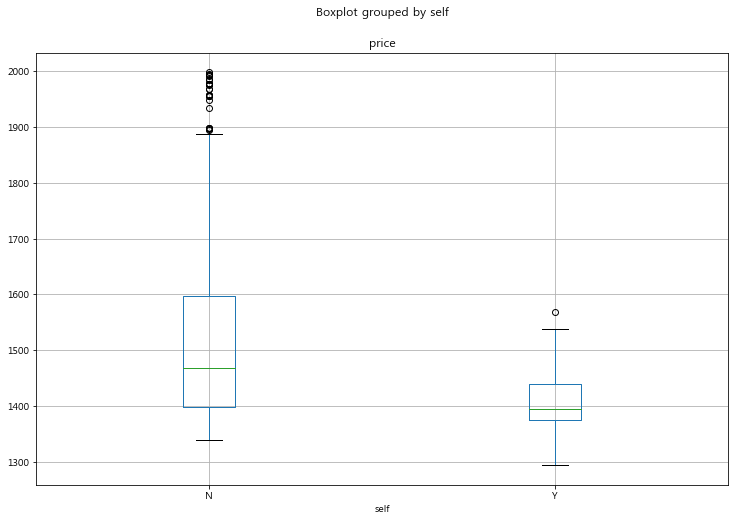

In [118]:
import seaborn as sns

stations.boxplot(column = 'price', by = 'self', figsize = (12, 8))

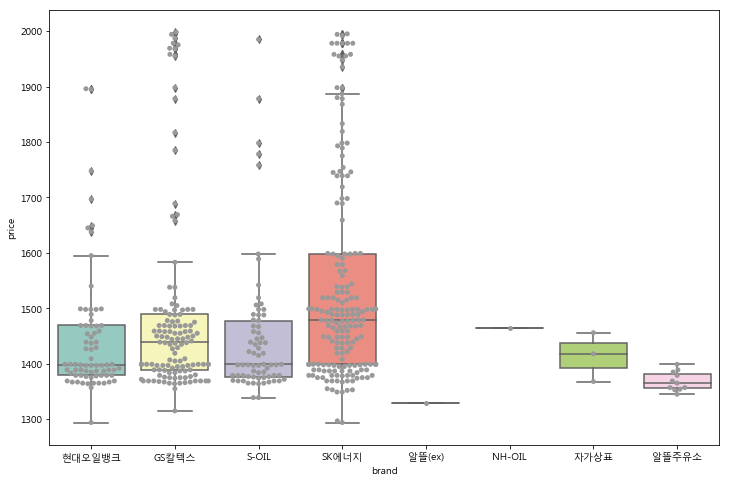

In [123]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'brand', y = 'price', data = stations, palette='Set3')
sns.swarmplot(x = 'brand', y = 'price', data = stations, color ='.6')

In [128]:
stations.sort_values(by = 'price', ascending=False).tail()

,oil_store,address,price,self,brand,zone
0,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1329.0,Y,알뜰(ex),서초구
2,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1315.0,Y,GS칼텍스,은평구
0,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1297.0,Y,SK에너지,강서구
1,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1294.0,Y,현대오일뱅크,은평구
0,타이거주유소,서울 은평구 수색로 188 (증산동),1294.0,Y,SK에너지,은평구


In [132]:
gu_data = pd.pivot_table(stations, index = ['zone'], values=['price'])
gu_data.head()

,price
zone,
강동구,1540.647059
강북구,1391.692308
강서구,1424.705882
관악구,1469.277778
광진구,1422.888889
